# Introduction to Basic Elements of Keras API

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import tensorflow.keras.losses as losses
import tensorflow.keras.optimizers as optimizers

import numpy as np
import matplotlib.pyplot as pl

## Layers

**Dense Layer**

- Transformation from $\mathbb{R}^n$ to $\mathbb{R}^m$.

- Parameters:
  - $w : (m, n)$
  - $b : (m,)$
  
- Output: $y = w\times x + b$
  where $x$ is the input, and $y$ is the
  output of the layer.


In [4]:
#
# Create a dense layer by specifying the output dimension.
#

dense = layers.Dense(5)

In [8]:
#
# The input vector dimension will be 10.
# We will need to generate a BATCH of four vectors.
#
batch = np.ones((4, 10))
batch

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [9]:
#
# Apply the dense layer to the batch.
#
dense(batch)

<tf.Tensor: shape=(4, 5), dtype=float32, numpy=
array([[-0.81755584, -0.92327225,  0.63487506,  1.1834128 , -0.4795947 ],
       [-0.81755584, -0.92327225,  0.63487506,  1.1834128 , -0.4795947 ],
       [-0.81755584, -0.92327225,  0.63487506,  1.1834128 , -0.4795947 ],
       [-0.81755584, -0.92327225,  0.63487506,  1.1834128 , -0.4795947 ]],
      dtype=float32)>

In [10]:
#
# We can examine the model parameters
#
dense.weights

[<tf.Variable 'dense/kernel:0' shape=(10, 5) dtype=float32, numpy=
 array([[ 0.24835563, -0.59119767,  0.57843155,  0.45029408, -0.30460855],
        [ 0.23567843,  0.16287762, -0.3743633 ,  0.36210388,  0.11524272],
        [-0.0648849 , -0.24838516, -0.10460079, -0.17434514, -0.32006925],
        [-0.538087  , -0.21029508, -0.5050446 ,  0.5601223 , -0.04609597],
        [-0.60266215, -0.39740434,  0.21631396,  0.15604413, -0.36941984],
        [-0.25786376,  0.3372205 ,  0.23038954,  0.13541377,  0.31834245],
        [ 0.1764316 , -0.22076029,  0.49660856, -0.43088692,  0.02457714],
        [-0.13360131,  0.4442956 ,  0.5118453 , -0.0025456 ,  0.46391672],
        [-0.22177449, -0.47575527, -0.32906234, -0.19013515, -0.61437154],
        [ 0.34085208,  0.27613187, -0.08564281,  0.31734735,  0.25289136]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(5,) dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>]

**Activation**

- No parameters
- Does not change the shape of the input.

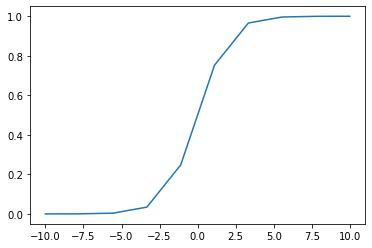

In [21]:
import tensorflow.keras.activations as activations

x_input = np.linspace(-10, 10, 10)
x_output = activations.sigmoid(x_input).numpy()
pl.plot(x_input, x_output);

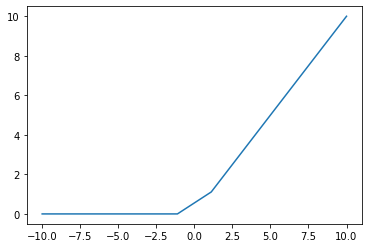

In [22]:
import tensorflow.keras.activations as activations

x_input = np.linspace(-10, 10, 10)
x_output = activations.relu(x_input).numpy()
pl.plot(x_input, x_output);

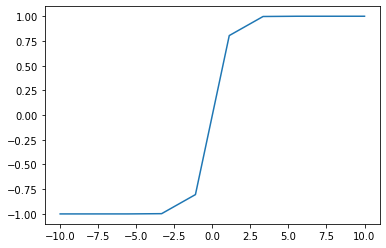

In [23]:
import tensorflow.keras.activations as activations

x_input = np.linspace(-10, 10, 10)
x_output = activations.tanh(x_input).numpy()
pl.plot(x_input, x_output);

# The Data

Load the data

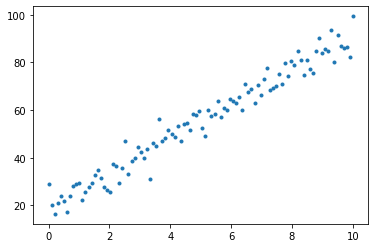

In [29]:
data = np.loadtxt('./line_fitting_data.csv', delimiter=',', skiprows=1)
x_data = data[:, 0]
y_data = data[:, 1]
pl.plot(x_data, y_data, '.')

# Building Keras Model

Build a sequential model with just one processing layer.

In [43]:
model = models.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(1),
])

model.compile(
    loss=losses.MeanSquaredError(),
    optimizer=optimizers.Adam(learning_rate=1e-1),
)

Inspect the model

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# Training

Keras model uses the `fit` method for training.

It uses the `evaluate` method for evaluation.

It uses the `predict` method for performing prediction with a trained model.

In [53]:
model.fit(x_data, y_data, epochs=10, batch_size=32)

Epoch 1/10
4/4 [==============================] - 0s 1ms/step - loss: 22.9496
Epoch 2/10
4/4 [==============================] - 0s 815us/step - loss: 22.8857
Epoch 3/10
4/4 [==============================] - 0s 825us/step - loss: 22.8121
Epoch 4/10
4/4 [==============================] - 0s 817us/step - loss: 22.7445
Epoch 5/10
4/4 [==============================] - 0s 838us/step - loss: 22.6768
Epoch 6/10
4/4 [==============================] - 0s 819us/step - loss: 22.6013
Epoch 7/10
4/4 [==============================] - 0s 888us/step - loss: 22.5417
Epoch 8/10
4/4 [==============================] - 0s 907us/step - loss: 22.4701
Epoch 9/10
4/4 [==============================] - 0s 763us/step - loss: 22.3789
Epoch 10/10
4/4 [==============================] - 0s 819us/step - loss: 22.2723


# Use the model for prediction

The `.predict` method computes the model output for a given **batch** of input.

In [55]:
y_pred = model.predict(x_data)

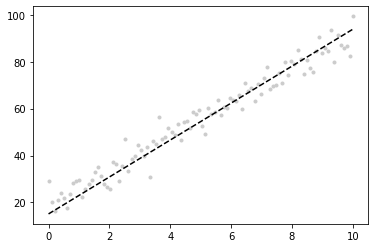

In [57]:
pl.plot(x_data, y_data, '.', color='#ccc')
pl.plot(x_data, y_pred, '--', color='black')